In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [2]:
# List of classifiers
classifiers = {
    'SVM (Linear)': SVC(kernel='linear', random_state=42),
    'SVM (Poly)': SVC(kernel='poly', random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', random_state=42),
    'SVM (Sigmoid)': SVC(kernel='sigmoid', random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'MLPC': MLPClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

# Store metrics for each classifier
metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

for name, clf in classifiers.items():
    # Train classifier
    clf.fit(X_train_std, y_train)

    # Predict
    y_pred = clf.predict(X_test_std)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [3]:
# Print metrics
for metric_name, metric_values in metrics.items():
    print(f"{metric_name}:")
    for classifier_name, value in zip(classifiers.keys(), metric_values):
        print(f"{classifier_name}: {value:.4f}")
    print()



Accuracy:
SVM (Linear): 0.9778
SVM (Poly): 0.9556
SVM (RBF): 1.0000
SVM (Sigmoid): 0.8889
KNN: 1.0000
Decision Tree: 1.0000
MLPC: 1.0000
Naive Bayes: 0.9778

Precision:
SVM (Linear): 0.9794
SVM (Poly): 0.9615
SVM (RBF): 1.0000
SVM (Sigmoid): 0.8989
KNN: 1.0000
Decision Tree: 1.0000
MLPC: 1.0000
Naive Bayes: 0.9794

Recall:
SVM (Linear): 0.9778
SVM (Poly): 0.9556
SVM (RBF): 1.0000
SVM (Sigmoid): 0.8889
KNN: 1.0000
Decision Tree: 1.0000
MLPC: 1.0000
Naive Bayes: 0.9778

F1 Score:
SVM (Linear): 0.9777
SVM (Poly): 0.9553
SVM (RBF): 1.0000
SVM (Sigmoid): 0.8874
KNN: 1.0000
Decision Tree: 1.0000
MLPC: 1.0000
Naive Bayes: 0.9777



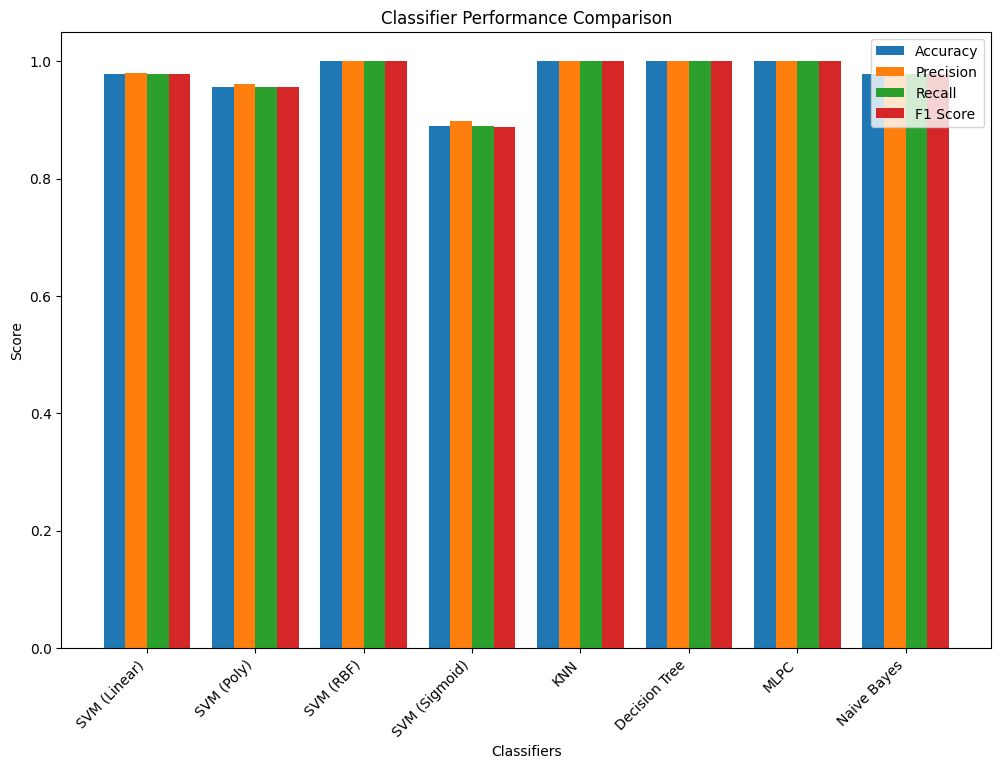

In [4]:
# Plotting
plt.figure(figsize=(12, 8))
bar_width = 0.2
index = np.arange(len(classifiers))
for i, (metric_name, metric_values) in enumerate(metrics.items()):
    plt.bar(index + i * bar_width, metric_values, bar_width, label=metric_name)

plt.xlabel('Classifiers')
plt.ylabel('Score')
plt.title('Classifier Performance Comparison')
plt.xticks(index + bar_width * (len(metrics) - 1) / 2, classifiers.keys(), rotation=45, ha='right')
plt.legend()
plt.show()